In [11]:
import pandas as pd
import numpy as np
from faker import Faker

# Generate synthetic data
fake = Faker()
np.random.seed(0)

# Generate 1000 samples
data = []
for _ in range(1000):
    income = np.random.randint(20000, 100000)
    debt = np.random.randint(0, 30000)
    credit_history = np.random.randint(1, 20)
    creditworthy = np.random.randint(0, 2)
    data.append([income, debt, credit_history, creditworthy])

# Convert to DataFrame
df = pd.DataFrame(data, columns=['income', 'debt', 'credit_history', 'creditworthy'])

# Save to CSV
df.to_csv('credit_data.csv', index=False)

In [9]:
!pip install faker

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB 435.7 kB/s eta 0:00:05
   - -------------------------------------- 0.1/1.8 MB 656.4 kB/s eta 0:00:03
   - -------------------------------------- 0.1/1.8 MB 657.6 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.8 MB 544.7 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.8 MB 481.4 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.8 MB 500.5 kB/s eta 0:00:04
   ---- ----------------------------------- 0.2/1.8 MB 506.0 kB/s eta 0:00:04
   ---- ----------------------------------- 0.2/1.8 MB 497.6 kB/s eta 0:00:04
   ----- ---------------------------------- 0.2/1.8 MB 558.1 kB/s eta 0:00:03
   ------ --------------------------------- 0.3/1.8 MB 589.5 kB/s eta 0:00:03
   -

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [17]:
# Load the dataset
df = pd.read_csv(r"C:\Users\hp\Documents\credit_data.csv")

# Check for any missing values
print(df.isnull().sum())

# Separate features and target variable
X = df.drop('creditworthy', axis=1)
y = df['creditworthy']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for models like SVM, but not always necessary for Random Forest)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

income            0
debt              0
credit_history    0
creditworthy      0
dtype: int64


In [19]:
# Initialize the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

In [21]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.54
Confusion Matrix:
[[47 42]
 [50 61]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.53      0.51        89
           1       0.59      0.55      0.57       111

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.54      0.54      0.54       200



In [23]:
# Example prediction for a new applicant
new_data = np.array([[50000, 10000, 5]])  # Example values for income, debt, and credit history
new_data_scaled = scaler.transform(new_data)  # Scale the new data
prediction = clf.predict(new_data_scaled)
print(f'Predicted class for new applicant: {prediction}')

Predicted class for new applicant: [1]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


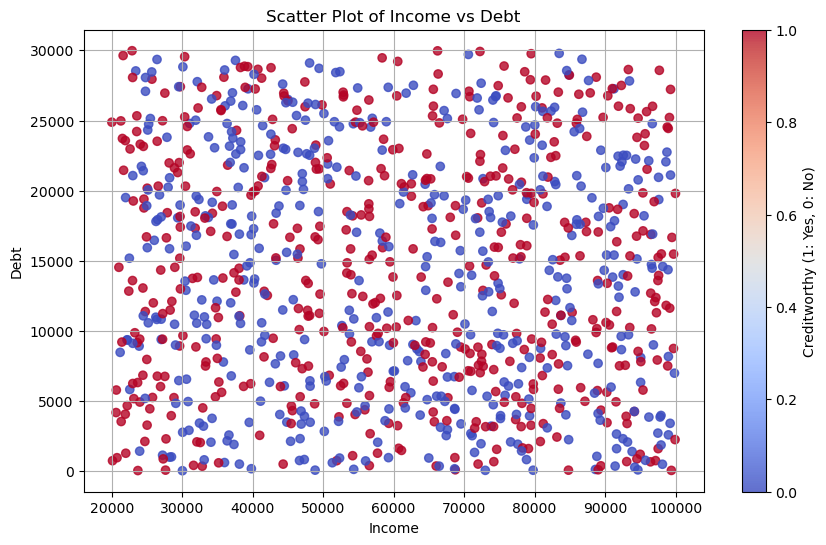

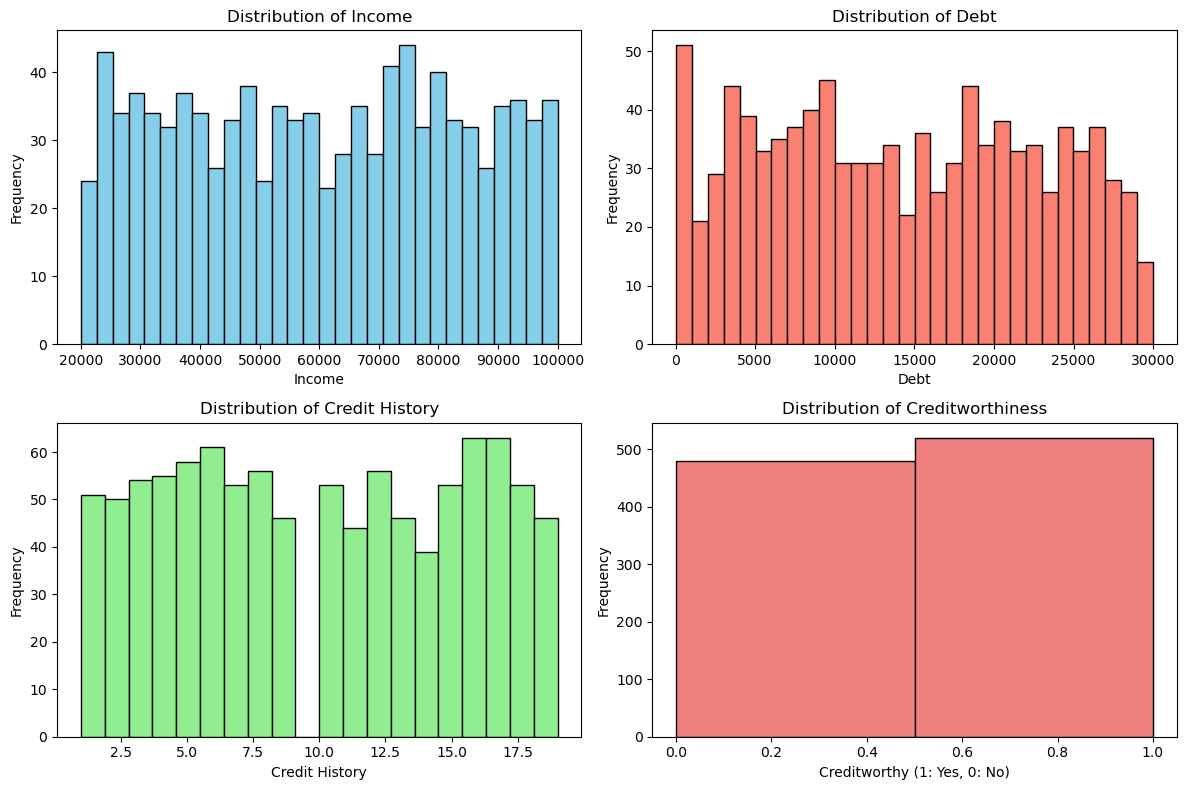

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('credit_data.csv')

# Scatter plot of income vs debt
plt.figure(figsize=(10, 6))
plt.scatter(df['income'], df['debt'], c=df['creditworthy'], cmap='coolwarm', alpha=0.8)
plt.colorbar(label='Creditworthy (1: Yes, 0: No)')
plt.xlabel('Income')
plt.ylabel('Debt')
plt.title('Scatter Plot of Income vs Debt')
plt.grid(True)
plt.show()

# Histograms of features
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.hist(df['income'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income')

plt.subplot(2, 2, 2)
plt.hist(df['debt'], bins=30, color='salmon', edgecolor='black')
plt.xlabel('Debt')
plt.ylabel('Frequency')
plt.title('Distribution of Debt')

plt.subplot(2, 2, 3)
plt.hist(df['credit_history'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Credit History')
plt.ylabel('Frequency')
plt.title('Distribution of Credit History')

plt.subplot(2, 2, 4)
plt.hist(df['creditworthy'], bins=2, color='lightcoral', edgecolor='black')
plt.xlabel('Creditworthy (1: Yes, 0: No)')
plt.ylabel('Frequency')
plt.title('Distribution of Creditworthiness')

plt.tight_layout()
plt.show()